# Regularization Demo
## Ridge, Lasso y Elastic Net
### 1. Cargamos librerías

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

### 2. Vemos qué pinta tiene el dataset

In [3]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 3. Rápido análisis exploratorio para ver sus dependencias lineales

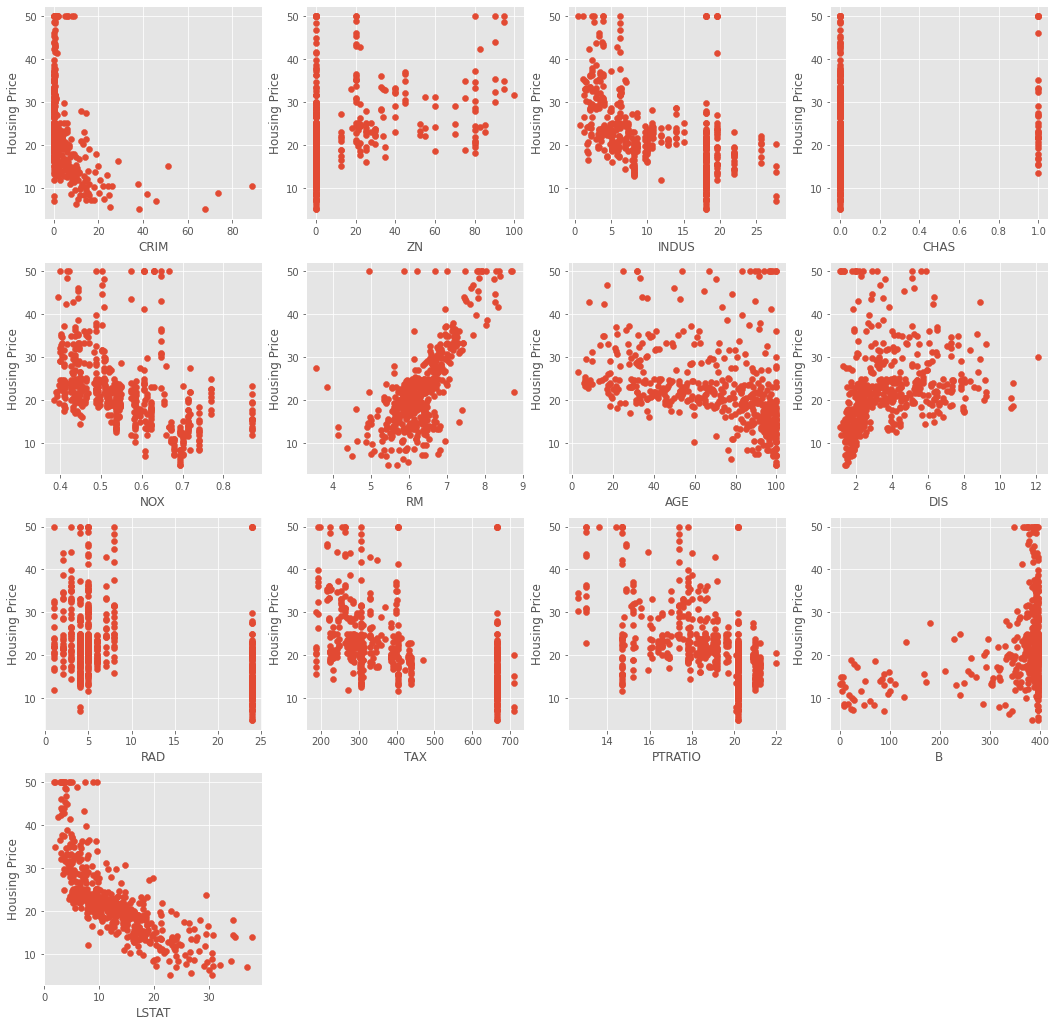

In [4]:
# Generate scatter plot of independent vs Dependent variable 
plt.style.use('ggplot')
fig = plt.figure(figsize=(18,18))

for index, feature_name in enumerate(boston_dataset.feature_names):
    ax = fig.add_subplot(4,4,index+1)
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
    ax.set_ylabel('Housing Price', size=12)
    ax.set_xlabel(feature_name, size = 12)

### 4. Preprocesado de los datos

In [5]:
# Load the dataset into Pandas Dataframe 
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input 
X = boston_pd.iloc[:,:-1]

#output 
y = boston_pd.iloc[:, -1]

print(boston_pd.head())

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.25, random_state = 42)


print("Train data shape of x = % s and y = % s" %(X_train.shape, y_train.shape))
print("Test data shape of x = % s and y = % s" %(X_test.shape, y_test.shape))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  
Train data shape of x = (379, 13) and y = (379,)
Test data shape of x = (127, 13) and y = (127,)


In [6]:
# aplico una regresión lineal múltiple
lreg = LinearRegression()
lreg.fit(X_train, y_train)

# genero una prediccion en test
lreg_y_pred = lreg.predict(X_test)

# calculo el mse (mean squared error)
mean_square_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared error on test set:", mean_square_error)

# juntando los coeficientes y sus correspondientes nombres de variables
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = X_train.columns
lreg_coefficient["Coefficient Estimate"] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared error on test set: 22.09869482709819
    Columns  Coefficient Estimate
0      CRIM             -0.128323
1        ZN              0.029552
2     INDUS              0.048859
3      CHAS              2.773503
4       NOX            -16.238829
5        RM              4.368755
6       AGE             -0.009248
7       DIS             -1.400867
8       RAD              0.257761
9       TAX             -0.009957
10  PTRATIO             -0.923123
11        B              0.013185
12    LSTAT             -0.517640


### 5. Regresión lineal múltiple

In [ ]:
# lo de arriba : )

Pintamos los coeficientes para verlos mejor

In [8]:
print("Coeficientes:", lreg.coef_)
print("Interceptor", lreg.intercept_)

Coeficientes: [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
Interceptor 29.836420163839108


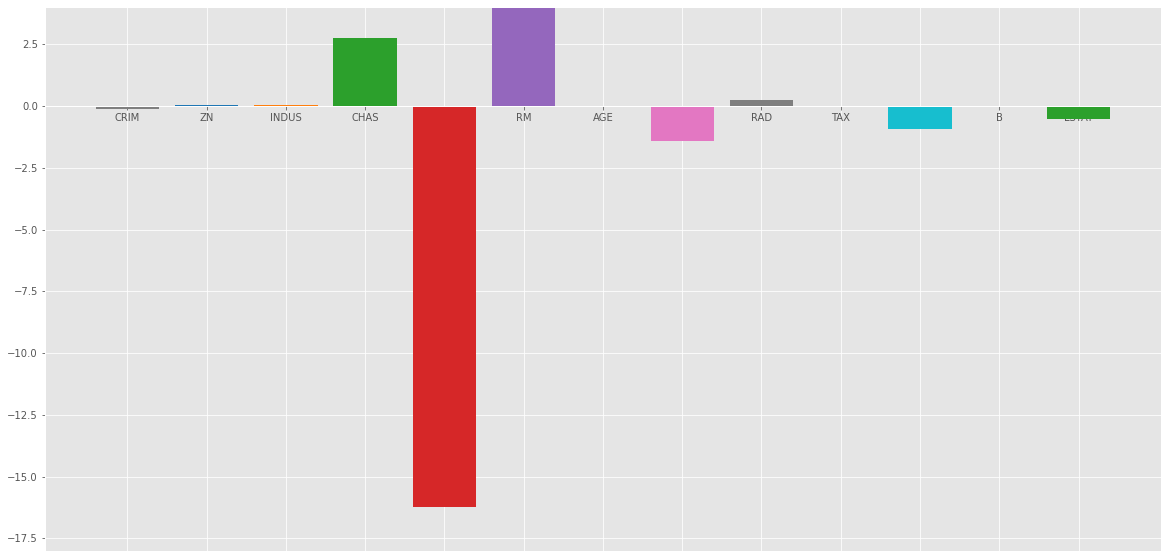

In [7]:
# pintando los coeficientes
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax.bar(lreg_coefficient["Columns"],
       lreg_coefficient["Coefficient Estimate"],
       color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18, 4])

plt.style.use('ggplot');

### 6. Ridge regression

In [8]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train, y_train)
y_pred = ridgeR.predict(X_test)


# calculo el mse
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# coeficientes y los pinto
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = X_train.columns
ridge_coefficient["Coefficient Estimate"] = ridgeR.coef_
print(ridge_coefficient)


22.48047550123385
    Columns  Coefficient Estimate
0      CRIM             -0.123830
1        ZN              0.031392
2     INDUS              0.017677
3      CHAS              2.542772
4       NOX             -8.772492
5        RM              4.379802
6       AGE             -0.015373
7       DIS             -1.290861
8       RAD              0.244068
9       TAX             -0.010824
10  PTRATIO             -0.833466
11        B              0.013486
12    LSTAT             -0.534354


In [9]:
print("Coeficientes:", ridgeR.coef_)
print("Interceptor:", ridgeR.intercept_)

Coeficientes: [-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]
Interceptor: 24.878370472969284


Veamos en la gráfica cómo quedaría para alpha = 1

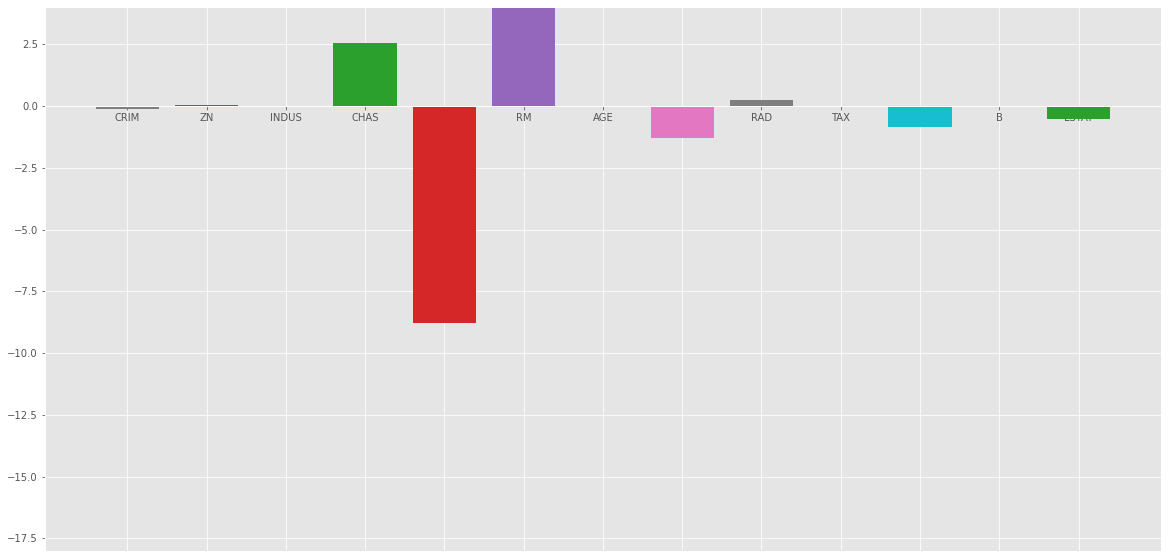

In [10]:
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax.bar(ridge_coefficient["Columns"],
       ridge_coefficient["Coefficient Estimate"],
       color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18, 4])

plt.style.use('ggplot');

Si hacemos ahora alpha = 10

In [11]:
ridgeR = Ridge(alpha = 10)
ridgeR.fit(X_train, y_train)
y_pred = ridgeR.predict(X_test)

# calculo el mse
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# coeficientes y los pinto
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = X_train.columns
ridge_coefficient["Coefficient Estimate"] = ridgeR.coef_
print(ridge_coefficient)



22.939228679246227
    Columns  Coefficient Estimate
0      CRIM             -0.121375
1        ZN              0.034219
2     INDUS             -0.013070
3      CHAS              1.821026
4       NOX             -1.687473
5        RM              4.090102
6       AGE             -0.018418
7       DIS             -1.188068
8       RAD              0.243519
9       TAX             -0.012083
10  PTRATIO             -0.767179
11        B              0.013696
12    LSTAT             -0.573435


In [12]:
print("Coeficientes:", ridgeR.coef_)
print("Interceptor:", ridgeR.intercept_)

Coeficientes: [-0.12137453  0.03421897 -0.01307037  1.8210257  -1.68747299  4.09010212
 -0.01841796 -1.18806788  0.24351944 -0.01208251 -0.76717881  0.01369631
 -0.5734354 ]
Interceptor: 22.652200585179735


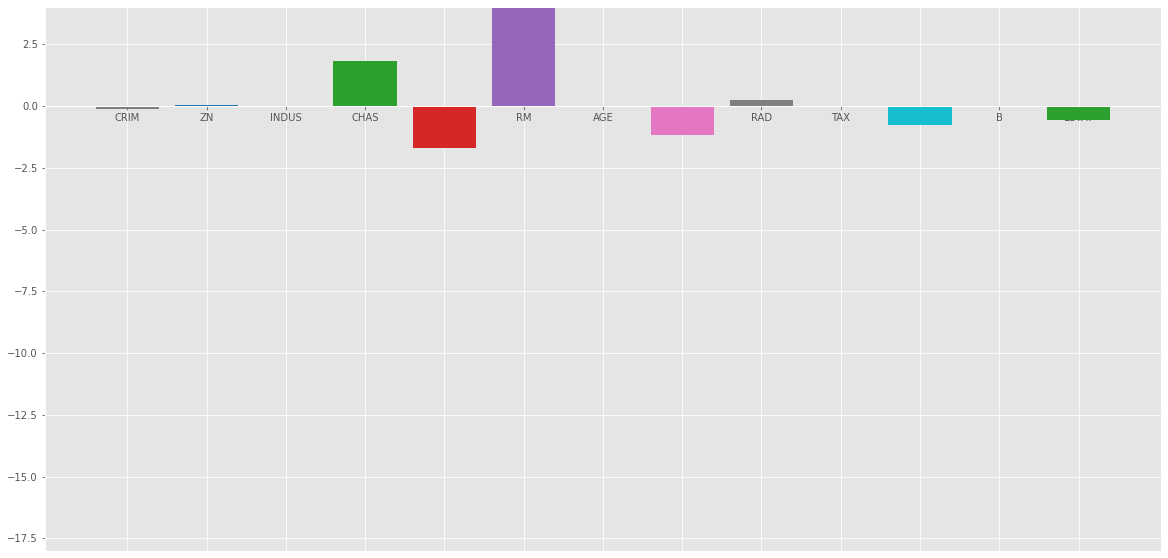

In [13]:
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax.bar(ridge_coefficient["Columns"],
       ridge_coefficient["Coefficient Estimate"],
       color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18, 4])

plt.style.use('ggplot');

### 7. Lasso regression

24.39075259035517
    Columns  Coefficient Estimate
0      CRIM             -0.083898
1        ZN              0.026461
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.545450
6       AGE              0.013458
7       DIS             -0.582829
8       RAD              0.207381
9       TAX             -0.011213
10  PTRATIO             -0.705006
11        B              0.011988
12    LSTAT             -0.757837
Coeficientes: [-0.0838981   0.02646051 -0.          0.         -0.          1.54544951
  0.01345772 -0.58282853  0.20738089 -0.01121302 -0.70500625  0.01198848
 -0.75783702]
Interceptor: 35.04378633572978


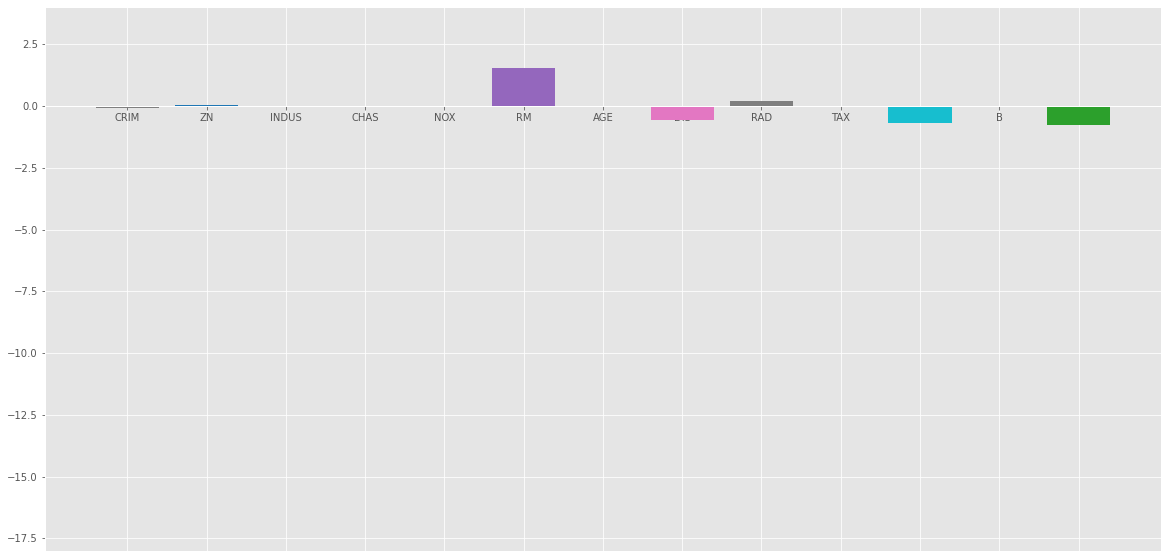

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

#fig, ax = plt.subplots(figsize = (20, 10))

# calculo el mse
mean_squared_error_lasso = np.mean((y_pred - y_test)**2)
print(mean_squared_error_lasso)

# coeficientes y los pinto
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"] = X_train.columns
lasso_coefficient["Coefficient Estimate"] = lasso.coef_
print(lasso_coefficient)

print("Coeficientes:", lasso.coef_)
print("Interceptor:", lasso.intercept_)

fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax.bar(lasso_coefficient["Columns"],
       lasso_coefficient["Coefficient Estimate"],
       color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18, 4])

plt.style.use('ggplot');

35.39173765117388
    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.008066
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX              0.000000
5        RM              0.000000
6       AGE              0.000000
7       DIS             -0.000000
8       RAD              0.000000
9       TAX             -0.008968
10  PTRATIO             -0.000000
11        B              0.010140
12    LSTAT             -0.629870
Coeficientes: [-0.          0.00806625 -0.          0.          0.          0.
  0.         -0.          0.         -0.00896833 -0.          0.01014021
 -0.62986968]
Interceptor: 30.693115462662064


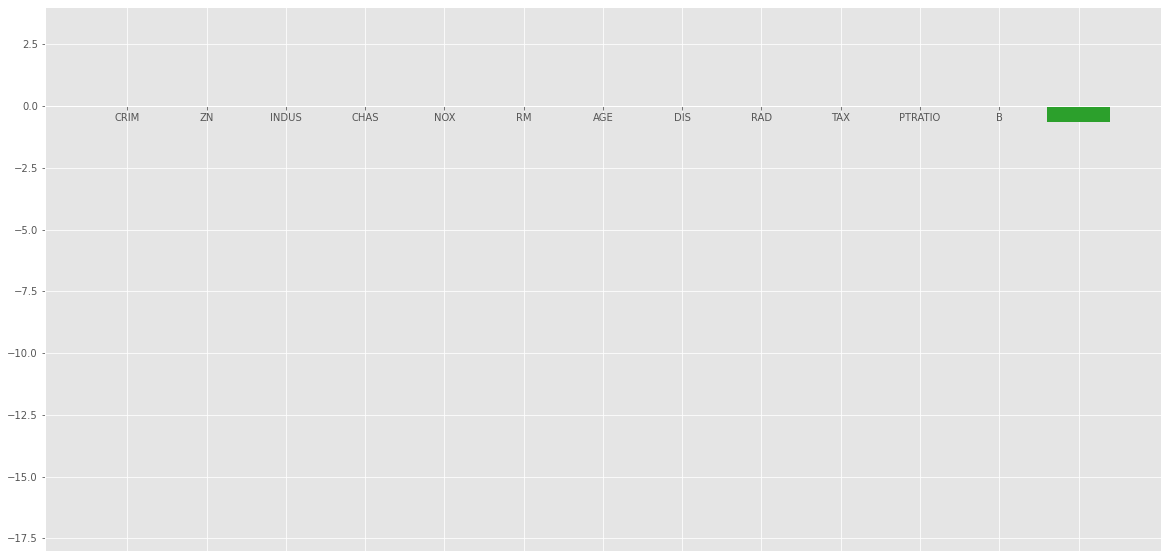

In [17]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# calculo el mse
mean_squared_error_lasso = np.mean((y_pred - y_test)**2)
print(mean_squared_error_lasso)

# coeficientes y los pinto
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"] = X_train.columns
lasso_coefficient["Coefficient Estimate"] = lasso.coef_
print(lasso_coefficient)

print("Coeficientes:", lasso.coef_)
print("Interceptor:", lasso.intercept_)

fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax.bar(lasso_coefficient["Columns"],
       lasso_coefficient["Coefficient Estimate"],
       color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18, 4])

plt.style.use('ggplot');

### 8. Elastic Net

24.343817991716637
    Columns  Coefficient Estimate
0      CRIM             -0.087992
1        ZN              0.028729
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.378834
6       AGE              0.013873
7       DIS             -0.616030
8       RAD              0.222633
9       TAX             -0.011868
10  PTRATIO             -0.716514
11        B              0.011961
12    LSTAT             -0.768984
Coeficientes: [-0.08799226  0.02872877 -0.          0.         -0.          1.37883439
  0.01387315 -0.61602985  0.2226327  -0.01186811 -0.71651394  0.01196065
 -0.76898432]
Interceptor: 36.66388800400624


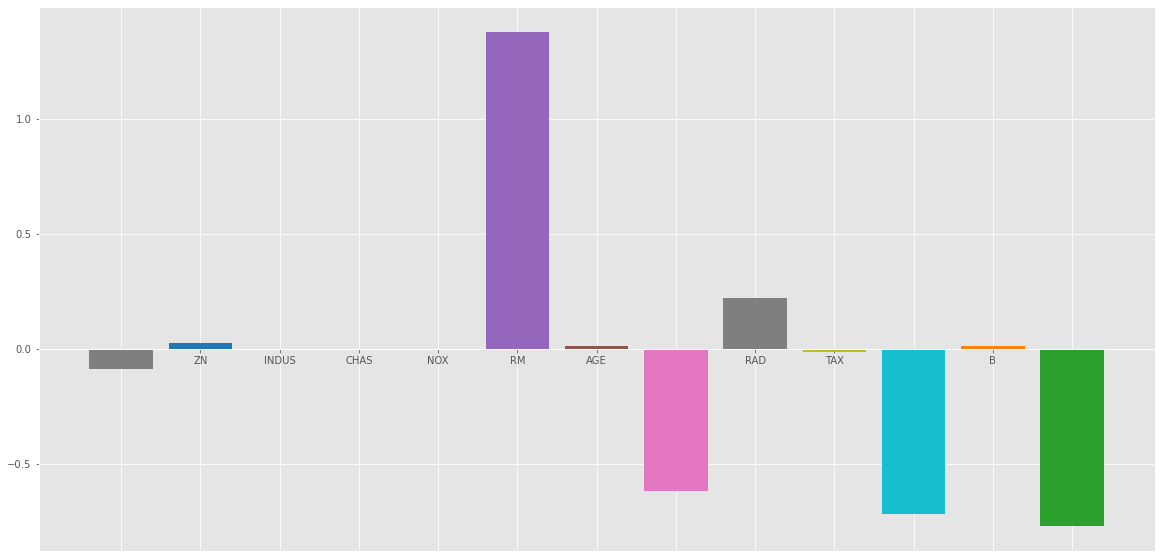

In [20]:
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(l1_ratio = 0.9)
e_net.fit(X_train, y_train)
y_pred = e_net.predict(X_test)

# calculo el mse
mean_squared_error_e = np.mean((y_pred - y_test)**2)
print(mean_squared_error_e)

# coeficientes y los pinto
enet_coefficient = pd.DataFrame()
enet_coefficient["Columns"] = X_train.columns
enet_coefficient["Coefficient Estimate"] = e_net.coef_
print(enet_coefficient)

print("Coeficientes:", e_net.coef_)
print("Interceptor:", e_net.intercept_)

fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax.bar(enet_coefficient["Columns"],
       enet_coefficient["Coefficient Estimate"],
       color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot');



In [35]:
from sklearn.model_selection import GridSearchCV

# defino el modelo
model = ElasticNet()

# defino el grid (rejilla)
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
grid['l1_ratio'] = np.arange(0.01,0.1, 1)

# defino la búsqueda
search = GridSearchCV(model, grid, scoring = "neg_mean_squared_error", cv = 10, n_jobs = -1)

# hago la búsqueda
results = search.fit(X_train, y_train)

print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
results.best_estimator_





MSE: -24.368
Config: {'alpha': 1e-05, 'l1_ratio': 0.01}


ElasticNet(alpha=1e-05, l1_ratio=0.01)

In [32]:
results.cv_results_

{'mean_fit_time': array([0.01730306, 0.02165868, 0.01579103, 0.01410518, 0.01070678,
        0.01471298, 0.02730007, 0.01918852]),
 'std_fit_time': array([0.00948252, 0.01042881, 0.00627911, 0.00960953, 0.0053773 ,
        0.01688636, 0.02686261, 0.01503429]),
 'mean_score_time': array([0.01027369, 0.00840685, 0.00574169, 0.00829275, 0.01035018,
        0.00904953, 0.01220589, 0.01808238]),
 'std_score_time': array([0.01259964, 0.00297854, 0.00204221, 0.00485256, 0.01132372,
        0.01175228, 0.01437624, 0.01329013]),
 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_l1_ratio': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1e-05, 'l1_ratio': 0.01},


{'mean_fit_time': array([0.01054883, 0.01480181, 0.01235332, 0.0166959 , 0.01029811,
        0.01010134, 0.00860033, 0.00943615]),
 'std_fit_time': array([0.00227501, 0.00568287, 0.00414441, 0.01208209, 0.00223121,
        0.00450157, 0.00237338, 0.0045174 ]),
 'mean_score_time': array([0.00669203, 0.00794125, 0.00904467, 0.0088073 , 0.00609927,
        0.00669484, 0.00581055, 0.00569632]),
 'std_score_time': array([0.00304083, 0.00495202, 0.00456229, 0.00321877, 0.00338896,
        0.00370537, 0.00241137, 0.00179053]),
 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_l1_ratio': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1e-05, 'l1_ratio': 0.01},


In [36]:
results

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0.01])},
             scoring='neg_mean_squared_error')

In [37]:
results.cv_results_

{'mean_fit_time': array([0.00691009, 0.01785276, 0.02584283, 0.01964734, 0.00807877,
        0.01326408, 0.01077089, 0.01486139]),
 'std_fit_time': array([0.00170884, 0.029014  , 0.01526111, 0.01795187, 0.00237886,
        0.00810345, 0.00547674, 0.01007543]),
 'mean_score_time': array([0.00688181, 0.02020283, 0.01635764, 0.00668294, 0.01206765,
        0.00618324, 0.00548527, 0.00697966]),
 'std_score_time': array([0.00497603, 0.02967934, 0.01494213, 0.00204582, 0.00650187,
        0.00284939, 0.00219647, 0.00420759]),
 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_l1_ratio': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1e-05, 'l1_ratio': 0.01},


Conclusion :
From the above analysis we can reach the following conclusion about different regularization methods:

Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.
Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.
Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.
Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases.
